In [1]:
# import constants
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add parent directory to path
from src.utils.constants import DATA_DIR, MNIST_DIR, SUPERVISED_DIR, WEAKLY_SUPERVISED_DIR
from data.dataset import SupervisedMNISTDataset, WeaklySupervisedMNISTDataset
from src.models.supervised_model import SupervisedModel
from src.models.weakly_supervised_model import WeaklySupervisedModel

import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
# load WeaklySupervisedModel with weights in path
model_path = "/Users/junhalee/Desktop/CS 231N/cs231n_final_project/training_results/weakly_supervised/20250604_081002/best_weakly_supervised_model.pth"

# Load the checkpoint
checkpoint = torch.load(model_path)
model = WeaklySupervisedModel()
# Load only the model state dict from the checkpoint
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [3]:
# test model
test_loader = DataLoader(WeaklySupervisedMNISTDataset('test', MNIST_DIR), batch_size=128, shuffle=False)

In [4]:
# get one batch of data
data, target = next(iter(test_loader))
# get prediction
output = model(data)


In [5]:
print(data.shape)
print(target.shape)

print(output.shape)

torch.Size([128, 2, 1, 28, 28])
torch.Size([128, 1])
torch.Size([128, 1])


In [6]:
print(data[0][0][0].shape)
print(data[0][1][0].shape)

torch.Size([28, 28])
torch.Size([28, 28])


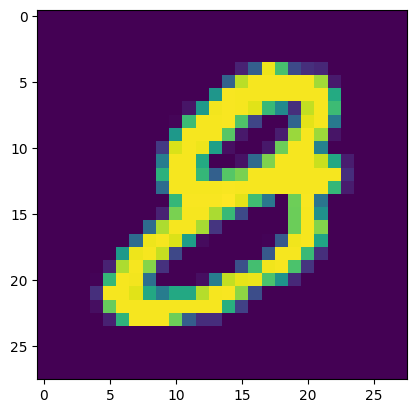

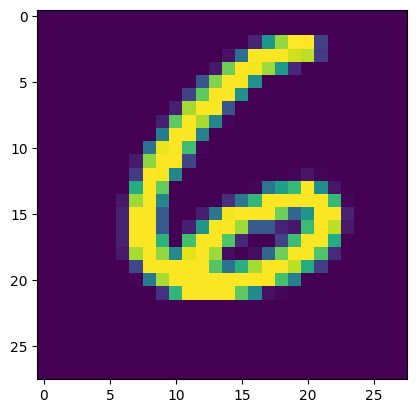

tensor([0.9997], grad_fn=<SelectBackward0>)


In [7]:
# display image of data[0][0][0]
plt.imshow(data[0][0][0].squeeze())
plt.show()
# display image of data[0][1][0]
plt.imshow(data[0][1][0].squeeze())
plt.show()

# display prediction
print(output[0])


In [11]:
def examine_data(i):
    plt.subplot(1, 2, 1)
    plt.imshow(data[i][0][0].squeeze())
    plt.title("First Image")
    plt.subplot(1, 2, 2)
    plt.imshow(data[i][1][0].squeeze())
    plt.title("Second Image")
    plt.show()

    image1_preds = model.predict(data[i][0].unsqueeze(0)).detach().numpy()[0]
    image2_preds = model.predict(data[i][1].unsqueeze(0)).detach().numpy()[0]

    # Make a horizontal bar plot of the predictions
    plt.subplot(1, 2, 1)
    plt.barh(range(10), image1_preds)
    plt.title("First Image Predictions")

    plt.subplot(1, 2, 2)
    plt.barh(range(10), image2_preds)
    plt.title("Second Image Predictions")
    plt.show()

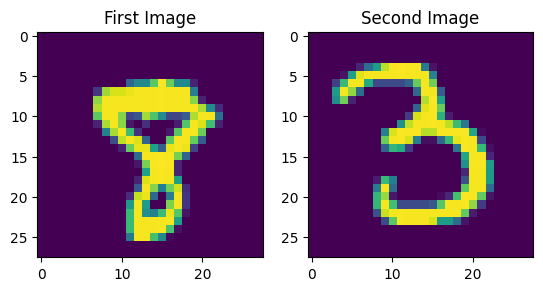

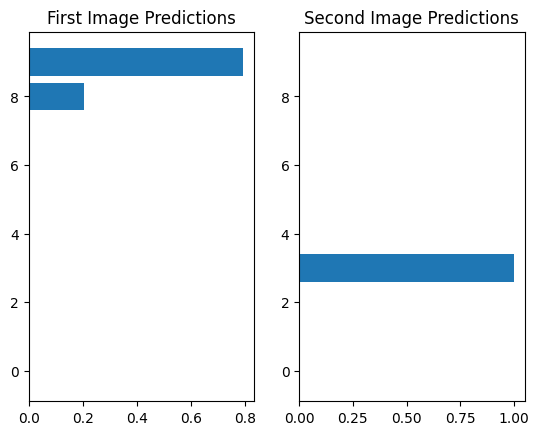

In [15]:
examine_data(90)